In [1]:
#library for connceting oracle server
!pip install cx_Oracle


In [2]:
#oracle client library
import cx_Oracle
import os
directory_path = os.getcwd() + "\instantclient-basic-windows.x64-21.3.0.0.0\instantclient_21_3"

cx_Oracle.init_oracle_client(lib_dir= directory_path)

In [3]:
#Credentials for accessing the oracle database
my_username = "rg0002d"
my_password = "rg0002d"

connection = cx_Oracle.connect(user=my_username, password=my_password, dsn="OBIWAN")

In [4]:
#Importing the required module 

import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [5]:
#Using Cursors fetching the Ph water sensor data using queries form oracle db
with connection.cursor() as cursor:
    cursor.execute("SELECT d.DETERMINANDLABEL as SENSOR_TYPE,s.SAMPLESAMPLINGPOINTLABEL as LOCATION,f.samplesampledmaterialtypelabel,s.sampleiscompliancesample,t.YEAR ,round(AVG(f.RESULT),2) as yearly_average  FROM fact_watersensor f,dim_time t,dim_sample s,dim_determinant d  where f.time_id = t.time_id and f.sample_id = s.sample_id  and f.DETERMINANDNOTATION = d.DETERMINANDNOTATION and d.DETERMINANDLABEL = 'pH'  group by s.SAMPLESAMPLINGPOINTLABEL,t.year,d.DETERMINANDLABEL,f.samplesampledmaterialtypelabel,s.sampleiscompliancesample order by t.year")
    df = DataFrame(cursor.fetchall())
    df.columns = [x[0] for x in cursor.description]


In [6]:
#Description of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SENSOR_TYPE                     143 non-null    object 
 1   LOCATION                        143 non-null    object 
 2   SAMPLESAMPLEDMATERIALTYPELABEL  143 non-null    object 
 3   SAMPLEISCOMPLIANCESAMPLE        143 non-null    object 
 4   YEAR                            143 non-null    object 
 5   YEARLY_AVERAGE                  143 non-null    float64
dtypes: float64(1), object(5)
memory usage: 6.8+ KB


In [7]:
#Overview of the dataframe 
df

,SENSOR_TYPE,LOCATION,SAMPLESAMPLEDMATERIALTYPELABEL,SAMPLEISCOMPLIANCESAMPLE,YEAR,YEARLY_AVERAGE
0,pH,R.OUSE A422 RD.BR.BRACKLEY,RIVER / RUNNING SURFACE WATER,FALSE,2000,8.22
1,pH,R.OUSE BOURTON MILL,RIVER / RUNNING SURFACE WATER,FALSE,2000,8.23
2,pH,R.OUSE FULWELL CROSSING,RIVER / RUNNING SURFACE WATER,FALSE,2000,8.22
3,pH,R.OUSE WATER STRATFORD RD.BR.,RIVER / RUNNING SURFACE WATER,FALSE,2000,8.18
4,pH,RED HOUSE NURSING HOME SYRESHAM,FINAL SEWAGE EFFLUENT,FALSE,2000,7.20
...,...,...,...,...,...,...
138,pH,R.TOVE CAPPENHAM BRIDGE,RIVER / RUNNING SURFACE WATER,FALSE,2016,8.00
139,pH,R.TOVE COSGROVE PARK FT.BR.,RIVER / RUNNING SURFACE WATER,FALSE,2016,8.11
140,pH,SILVERSTONE BK.A43 RD.BR.,ANY WATER,FALSE,2016,7.91
141,pH,SILVERSTONE BK.A43 RD.BR.,RIVER / RUNNING SURFACE WATER,FALSE,2016,7.82


In [8]:
#Validating Null values
df.isna().sum()

SENSOR_TYPE                       0
LOCATION                          0
SAMPLESAMPLEDMATERIALTYPELABEL    0
SAMPLEISCOMPLIANCESAMPLE          0
YEAR                              0
YEARLY_AVERAGE                    0
dtype: int64

In [9]:
#description of the dependent variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEARLY_AVERAGE,143.0,7.992517,0.27286,6.19,7.93,8.05,8.135,8.84


In [10]:
#Removing the non required columns 
df.drop('SENSOR_TYPE', axis=1,inplace = True)


C:\Institutions\Gre\Apps\Anaconda3-2021.05\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


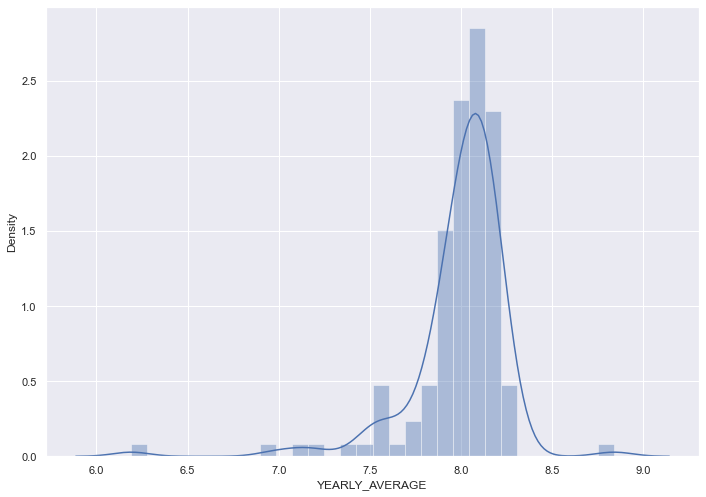

In [11]:
#Plotting standard normal distribution for dependent value 
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.distplot(df['YEARLY_AVERAGE'], bins=30)
    plt.show()

In [12]:
#Encoding the categorical columns to quantitative 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df['SAMPLESAMPLEDMATERIALTYPELABEL'] = le.fit_transform(df['SAMPLESAMPLEDMATERIALTYPELABEL'])
df['LOCATION'] = le.fit_transform(df['LOCATION'])
df['SAMPLEISCOMPLIANCESAMPLE'] = le.fit_transform(df['SAMPLEISCOMPLIANCESAMPLE'])

In [13]:
#Seperating the Dependent y and Independent X features 
X = df.iloc[:,:-1].values  #independent variable array
y = df.iloc[:,4].values #dependent variable vector

In [14]:
#Enforcing Min-Max Scaling 
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [15]:
#Splitting into training and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.70, random_state=8)

In [16]:
#Impleneting the data values in Linear Regressor function
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data
print(regressor.intercept_)
print(regressor.coef_)

8.243231978180656
[ 0.1257519  -0.18971538 -0.51190797 -0.17162799]


In [17]:
#Predicting the values for X train
y_pred = regressor.predict(X_test)
y_pred

array([7.9950616 , 8.04223138, 7.99513141, 7.97573949, 8.25068092,
       7.99300002, 8.02297907, 8.06155349, 8.02311869, 8.06134406,
       8.13450934, 8.06368487, 8.07661282, 7.98433485, 8.09586512,
       7.89893971, 8.00365696, 8.13024657, 7.999464  , 8.13877212,
       8.09806632, 7.95662681, 8.11305584, 7.62339875, 7.94583025,
       7.99520122, 7.96714413, 7.97566968, 7.96927552, 8.02077788,
       8.0808756 , 7.94369886, 8.00771031, 7.78425966, 7.49694877,
       7.94163728, 8.05061731, 8.01410448, 7.88828277, 7.52671839,
       8.07274873, 8.05082674, 7.97787088])

<AxesSubplot:>

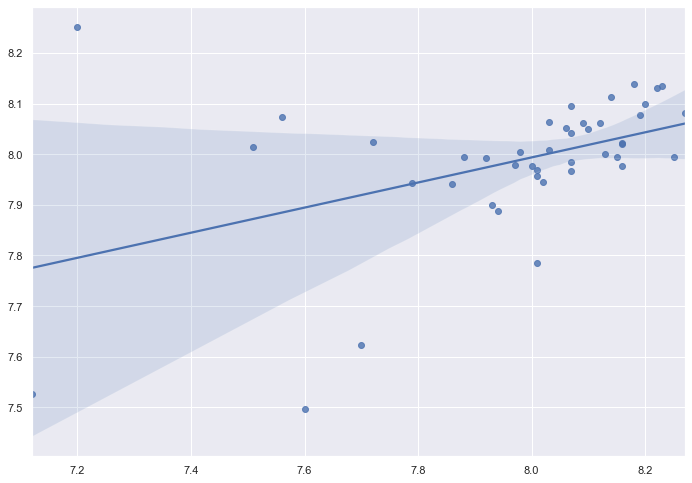

In [18]:
#Plotting the result based on the graph 
import seaborn as sns
sns.regplot(x=y_test,y=y_pred)

In [19]:
#Calculating MSE,MAE and RMSE and R2
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score is {}'.format(r2_score(y_test, y_pred)))

MAE: 0.13989675738146
MSE: 0.05334645972185372
RMSE: 0.23096852539221382
R2 score is 0.17510257924101968


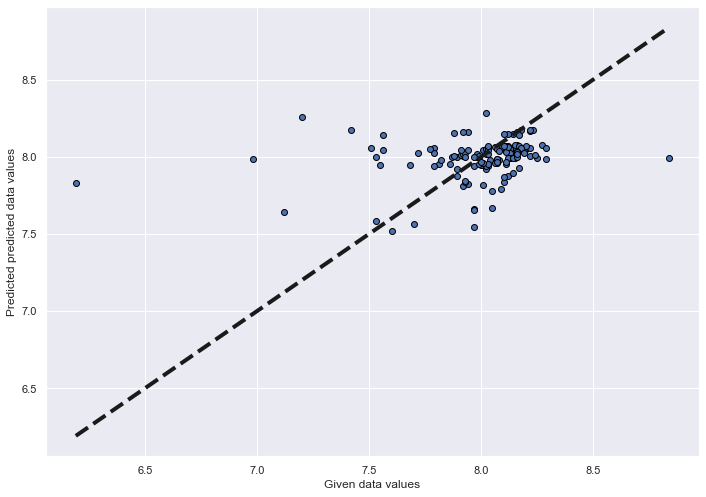

In [20]:
#Enforcing Cross validation for better results of the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
regressor = LinearRegression()
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted_dat = cross_val_predict(regressor, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted_dat, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Given data values")
ax.set_ylabel("Predicted predicted data values")
plt.show()